# **Regression, Observations, and Interventions**

In [1]:
import numpy as np
from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

COLORS = [
    '#00B0F0',
    '#FF0000'
]

## Associations in observational data versus linear regression

In [Chapter 02](\Chapter_02_Ladder_of_Causation.ipynb), we discussed the concept of association using Pearson/Spearman's correlation, now we will use a regression model to quantify it:

$\hat{Y}_{X = x} = E[Y|X=x]$

- $E[.]$ is the **expected value**;
- $X$ can be multidimentional, and in that case we call this **multiple regression**;
- LR allows us to quantify the strength of the relationship between predictors and target, it's **coefficients**;
- LR can be used to model non-linear relationship, because it has to be linear in paramenter, not in the data;
- We can also consider the **interaction** by adding the multiplicative term of predictors to the equation (for eg, $X_1 * X_2$).

In [5]:
# Set the seed for reproducibility
np.random.seed(45)

# No. of samples
N_SAMPLES = 5000

# Define true model parameters
# Arbitrarily choosing coef, this is our data generating process
alpha = 1.12
beta = 0.93
epsilon = np.random.randn(N_SAMPLES)

# Generate X
X = np.random.randn(N_SAMPLES)

# Compute Y
y = alpha + beta * X + 0.5 * epsilon

# Statsmodel models require us to add constant
X = sm.add_constant(X)

print(X[:5, :])

[[ 1.          0.11530002]
 [ 1.         -0.43617719]
 [ 1.         -0.54138887]
 [ 1.         -1.64773122]
 [ 1.         -0.32616934]]


Fit the regression model using `statsmodels` and print the summary

In [3]:
# Instantiate the model and fit it
model = sm.OLS(y, X)
fitted_model = model.fit()

# Print results summary
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                 1.681e+04
Date:                Tue, 25 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:03:40   Log-Likelihood:                -3615.0
No. Observations:                5000   AIC:                             7234.
Df Residuals:                    4998   BIC:                             7247.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1243      0.007    159.391      0.0

And generate predictions. We can see both constant and `X1`'s coeficients are associated with p-value below 0.001, indicate that they are **statistically significant** at p < 0.5 level.

In [4]:
y_pred = fitted_model.predict(X)

#### p-values and statistical significane

- p-values help to distinguish between the **signal** and the **noise**;
- the **null hypothesis** usually states that there is **no effect/difference** between 2 objects that we compare. In LR:
  - there are null hypothesis for coefficients: `coef` not significantly <> `0`;
  - and null hypothesis for the whole modell: model is not significantly <> **null model** (intercept-only);

> In statistics, the p-value is the probability that, using a given statistical model,
> the statistical summary (such as the sample mean difference between two compared groups) 
> would be the same as or more extreme than the actual observed results.
[[Source](https://math.stackexchange.com/questions/2064035/understanding-the-p-value#:~:text=In%20statistics%2C%20the%20p%2Dvalue,than%20the%20actual%20observed%20results.)]

- [[More on StatsExchange](https://stats.stackexchange.com/questions/608846/how-can-i-understand-p-value)]
- Critical review: <https://www.tandfonline.com/doi/full/10.1080/00031305.2016.1154108>

#### geometric interpretation of linear regression

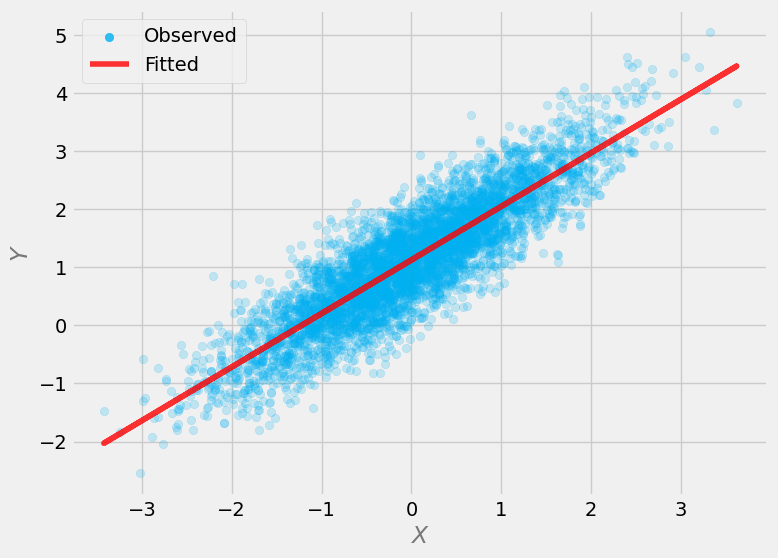

In [9]:
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], y, color=COLORS[0], label='Observed', alpha=.2)
plt.plot(X[:, 1], y_pred, color=COLORS[1], label='Fitted', alpha=.8)
plt.xlabel('$X$', alpha=.5)
plt.ylabel('$Y$', alpha=.5)
legend = plt.legend()

# Set opacity for the legend
[_.set_alpha(.8) for _ in legend.legend_handles] # not legendHandles

plt.show()

In the case of multiple regression, the line becomes a hyperplane!

#### reversing the order

- LR is *rung 1*, we might find statistical significane while there is truely no relationship;

In [10]:
# Let's remove the constant (now X becomes our target variable) 
x_rev = X[:, 1]

# Let's add constant (now Y becomes our predictor)
Y_rev = sm.add_constant(y)

# Instantiate the model and fit it
model_rev = sm.OLS(x_rev, Y_rev)
fitted_model_rev = model_rev.fit()

# Print results summary
print(fitted_model_rev.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                 1.681e+04
Date:                Tue, 25 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:35:48   Log-Likelihood:                -3375.0
No. Observations:                5000   AIC:                             6754.
Df Residuals:                    4998   BIC:                             6767.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9441      0.010    -96.048      0.0

Predict

In [11]:
x_pred_rev = fitted_model_rev.predict(Y_rev)

And plot

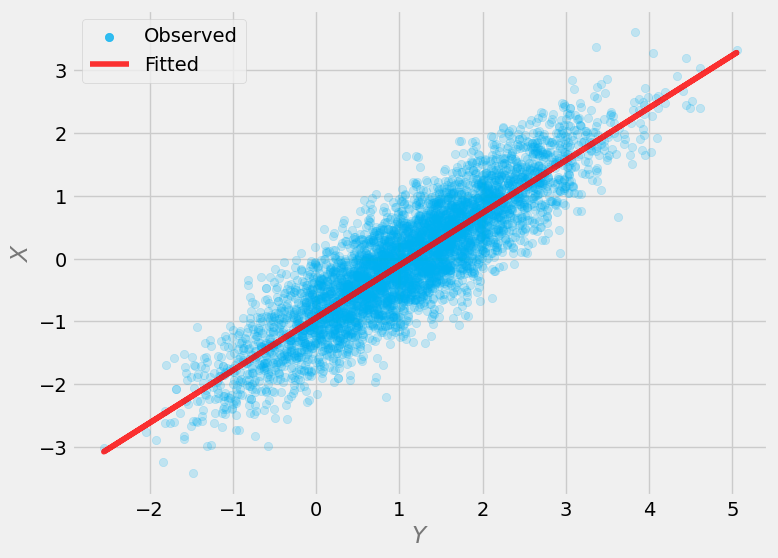

In [14]:
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_rev[:, 1], x_rev, color=COLORS[0], label='Observed', alpha=.2)
plt.plot(Y_rev[:, 1], x_pred_rev, color=COLORS[1], label='Fitted', alpha=.8)
plt.xlabel('$Y$', alpha=.5)
plt.ylabel('$X$', alpha=.5)
legend = plt.legend()

# Set opacity for the legend
[_.set_alpha(.8) for _ in legend.legend_handles]

plt.show()

### Should we always control for all available covariates?

In [15]:
import graphviz

#### Visualize the model

In [16]:
# Create a directed graph
g_1 = graphviz.Digraph(format='png')

# Add nodes
nodes_1 = ['A', 'X', 'B', 'Y']
[g_1.node(n) for n in nodes_1]

g_1.edges(['AX', 'XB', 'AY', 'YB'])

Render for print

In [17]:
g_1.render('img/ch_03_graph_01')

'img\\ch_03_graph_01.png'

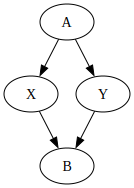

In [18]:
# Display the graph
g_1

## Causal perspective of statistical control

## Regression and structural models